# 1. 概要
このコンペティションの目的は、細胞における異なるモダリティの関係をよりよく理解することである。このノートブックの目標は、関連するデータについてより深く理解することである。これにより、モデル設計やデータレイアウトについて適切な判断をするために必要な知識を身につけることができる。

**これは現在進行中である。もし説明が必要な点があれば、私に教えてください。私は遺伝学について非常に理解が浅いです。虚偽があれば遠慮なく指摘してください**。

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>1.1 私たちは何を学びたいのか</b></p> 
</div> 

細胞における転写の間、情報の流れが知られています。RNAを生成するためには、DNAがアクセス可能である必要があります。生成されたRNAは、タンパク質を構築するための鋳型として使用されます。したがって、DNAのアクセス性に関する知識を利用して、RNAの将来の状態を予測することができ、RNAに関する知識を利用して、将来のタンパク質の濃度を予測することができると考えることができる。今回のチャレンジでは、このようなDNA、RNA、タンパク質の関係をより詳しく知りたいと考えています。そのためには、細胞の3つの異なる性質に関する情報を取得する必要があります。
* クロマチンへのアクセス性
* 遺伝子発現
* 表面タンパク質のレベル

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>1.2 細胞の3つの性質はどのように表現されるのですか</b></p> 
</div> 


セルのこれらのプロパティに関する情報がどのようにレイアウトされているかを見る前に、データを取得するために使用されるメソッドは、一度にすべてのプロパティをキャプチャしないことに注意する必要があります。テストには2つの異なる方法がある。1つ目は「10x Chromium Single Cell Multiome ATAC + Gene Expression」略して「マルチオーム」検査です。もう一つは、「10x Genomics Single Cell Gene Expression with Feature Barcoding technology」略して「citeseq」テストです。

マルチオームテストでは、**クロマチンアクセシビリティと遺伝子発現**を測定することができます。citeseq検査では、**遺伝子発現と表面タンパク質レベル**を測定することができます。

したがって、クロマチンアクセシビリティと表面タンパク量に関するデータが一度に得られます（それぞれmultiomeとciteseqから）。そして、遺伝子発現については、各検査から2回ずつデータを取得することになります。それでは、実際にどのようにデータが表示されるかを見てみましょう。


<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>1.3 import</b></p> 
</div> 


In [3]:
# installs
!pip install --quiet tables

# imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# set paths
DATA_DIR = "../dataset/"
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

FP_CITE_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_cite_inputs.h5")
FP_CITE_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_cite_targets.h5")
FP_CITE_TEST_INPUTS = os.path.join(DATA_DIR,"test_cite_inputs.h5")

FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_MULTIOME_TEST_INPUTS = os.path.join(DATA_DIR,"test_multi_inputs.h5")

FP_SUBMISSION = os.path.join(DATA_DIR,"sample_submission.csv")
FP_EVALUATION_IDS = os.path.join(DATA_DIR,"evaluation_ids.csv")

# 2. Data

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>2.1 クロマチンアクセシビリティデータ</b></p>
</div>

まず、クロマチンのアクセシビリティに関するデータを見てみよう。対応するHDF5ファイルを見ると、データは次元(228942, 105942)を持つ1つのテーブルに格納されていることがわかる。各値は32bitのfloatとして格納されている。したがって、32ビットの精度を保ちながらテーブル全体をメモリにロードするためには、約90GBのRAMが必要になります。これはかなりの量です。したがって、ここではデータの一部分しか見ず、また学習や変換の際にデータセット全体をメモリにロードしないことにします。他のHDF5テーブルも32bit浮動小数点数として値を格納しています。

In [4]:
# Loading the whole dataset into pandas exceeds the memory,
# therefore we define start and stop values
START = int(1e4)
STOP = START+1000

df_multi_train_x = pd.read_hdf(FP_MULTIOME_TRAIN_INPUTS,start=START,stop=STOP)
df_multi_train_x.head()

gene_id,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
cell_id,,,,,,,,,,,,,,,,,,,,,
ba6695d0c309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30f05b8589b3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3feaf6105071,3.858121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dafc8ee5d1ed,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.005253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5e1e53b20abe,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


見てわかるように、個々のセルはcell_idで識別されます。そして、「STUFF:NUMBER-NUMBER」のような名前の列が228942個あります。STUFFは染色体の名前で、数値は遺伝子の始まりと終わりを示す範囲です。では、どのような染色体があるのか見てみましょう。

In [5]:
print(sorted(list({i[:i.find(':')] for i in df_multi_train_x.columns})))

['GL000194.1', 'GL000195.1', 'GL000205.2', 'GL000218.1', 'GL000219.1', 'KI270711.1', 'KI270713.1', 'KI270721.1', 'KI270726.1', 'KI270727.1', 'KI270728.1', 'KI270731.1', 'KI270734.1', 'chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY']


ヒトが持つ22本の染色体（常染色体）であるchr1〜chr22と、性染色体であるchrXとchrYは、実際に私たちが期待する染色体として見つかりました。KIやGLで始まる染色体はどうでしょうか？インターネットで調べてみると、これらは配置されていない遺伝子だそうです。これらはヒトゲノムの一部である可能性が高いが、どの染色体にあるのかはまだ分かっていない。ここで注目すべきは、ヒトのタンパク質をコードする遺伝子の数が19.9k〜21.3kと推定されていることである。従って、タンパク質コード遺伝子だけでなく、もっと多くの遺伝子を測定しているようです。

次に、持っている値の範囲を確認します。

In [6]:
# first call to min/max gives us the min/max in each column. 
# Than we min/max again to get total min/max
print(f"Values range from {df_multi_train_x.min().min()} to {df_multi_train_x.max().max()}")

Values range from 0.0 to 16.933687210083008


それでは、これまでのDNAのアクセシビリティに対応するデータについて、わかってきたことをまとめてみましょう。

* クロマチンへのアクセスは、全部で約106kの細胞について測定しています。
* 細胞あたり約229kの遺伝子が、ある特定の遺伝子にどれだけアクセスしやすいかを測定しています。
* アクセス性は0.0から18までの数字で示される。アクセス性は0.0～18の数字で表示されます。
* データセットの値は32bit精度のfloatを使用しています。

クロマチンアクセスデータについて、他に知りたいことは？

* 各細胞で非ゼロである値はいくつですか？
* 標準偏差と非ゼロ値の平均は？

まず、各細胞のクロマチンアクセシビリティの値を詳しく見てみましょう。

In [7]:
# get data about non-zero values
min_cells_non_zero = df_multi_train_x.gt(0).sum(axis=1).min()
max_cells_non_zero = df_multi_train_x.gt(0).sum(axis=1).max()
sum_non_zero_values = df_multi_train_x.sum().sum()
count_non_zero_values = df_multi_train_x.gt(0).sum().sum()
average_non_zero_per_gene = df_multi_train_x[df_multi_train_x.gt(0)].count(axis = 1).mean()

print(f"Each cell has at least {min_cells_non_zero} genes with non-zero accessibility values and a maximum of {max_cells_non_zero}.")
print(f"On average there are {round(average_non_zero_per_gene)} genes with non-zero accessibility values in each cell.")
print(f"The average non-zero value is about {sum_non_zero_values / count_non_zero_values:.2f}.")

# investigate standard deviation of features
std_dev_of_genes = df_multi_train_x.std()

# ignore genes that are only accessible in a single cell
std_dev_of_genes_without_singles = std_dev_of_genes[df_multi_train_x.gt(0).sum().gt(1)]
print(f"The standard deviation of our features is between {std_dev_of_genes_without_singles.min():.2f} and {std_dev_of_genes_without_singles.max():.2f}.\nThe average standard deviation is {std_dev_of_genes_without_singles.mean():.2f}")

Each cell has at least 767 genes with non-zero accessibility values and a maximum of 29927.
On average there are 6723 genes with non-zero accessibility values in each cell.
The average non-zero value is about 1.58.
The standard deviation of our features is between 0.03 and 0.71.
The average standard deviation is 0.33


これは、最初の問題で特徴量から期待できることについて、既に良い情報である。各サンプルにどれだけの特徴があるかをさらによく理解するために、特徴数あたりのセルの数をプロットしてみます。

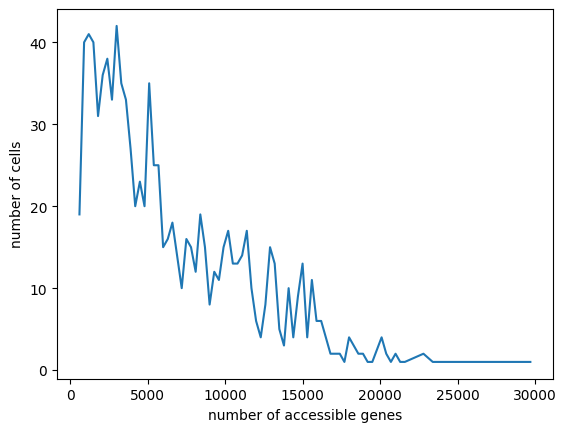

In [8]:
s = df_multi_train_x.gt(0).sum(axis = 1)
counts = s.groupby(lambda x: s[x] // 300).count()
counts.index = counts.index * 300

fig, ax = plt.subplots()
ax.plot(counts.index, counts.values)
ax.set_xlabel('number of accessible genes')
ax.set_ylabel('number of cells')
plt.show()

このように、私たちの細胞の大部分は、2Kから7Kのアクセス可能な遺伝子を持っていることがわかります。

これで、マルチオームテストで測定したクロマチンアクセシビリティについて、かなり理解が深まったと思います。続いて、遺伝子発現の特徴を調べます。

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>2.2 遺伝子発現データ</b></p>
</div>

前述したように、我々は遺伝子発現データを含む2つのデータセットを持っている。まず、マルチオームテストのデータを見てみます。

### 2.2.1 マルチオームからの遺伝子発現
本当はデータセット全体を一度に読み込むことができるのですが、今はすでに見たXの値に対応する部分だけを見ておきます。

In [9]:
df_multi_train_y = pd.read_hdf(FP_MULTIOME_TRAIN_TARGETS, start=START, stop=STOP)
df_multi_train_y.head()

gene_id,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
ba6695d0c309,0.0,4.842627,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4.842627,...,0.000000,0.000000,4.842627,0.0,4.842627,0.000000,0.0,0.000000,4.842627,0.000000
30f05b8589b3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,5.342478,0.0,0.000000,0.000000,0.000000
3feaf6105071,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5.016188,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,5.016188,0.0,5.016188,0.000000,5.016188
dafc8ee5d1ed,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,4.752183,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,4.752183
5e1e53b20abe,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,4.115469,4.115469,...,4.115469,0.000000,4.115469,0.0,0.000000,5.203142,0.0,0.000000,4.115469,4.800423


このように、モデルが予測する必要のある値が23418個もあることがわかります。しかし、その値とはいったい何なのでしょうか？

In [10]:
print(sorted(list({i[:10] for i in df_multi_train_y.columns})))
print(df_multi_train_y.columns.str.len().unique().item())

['ENSG000000', 'ENSG000001', 'ENSG000002']
15


見ての通り、全ての特徴はENSGで始まり、その後5つのゼロを持つ。ここにあるのはEnsambl IDと呼ばれるものである。一般的には、ENS(species)(object type)(identifier).(version) という形式である。
ENSはensembl IDを見ていることを示す。ヒトの遺伝子の場合、speciesの部分は慣習的に空である。オブジェクトタイプは遺伝子を表すGです。識別子は常に11桁の長さになっているようです。そして、このデータにはバージョン指定がないようです。

ここで、先ほどと似たような性質がないか調べてみます。

In [11]:
print(f"Values for gene expression range from {df_multi_train_y.min().min():.2f} to {df_multi_train_y.max().max():.2f}")

# get data about non-zero values
min_cells_non_zero_y = df_multi_train_y.gt(0).sum(axis=1).min()
max_cells_non_zero_y = df_multi_train_y.gt(0).sum(axis=1).max()
sum_non_zero_values_y = df_multi_train_y.sum().sum()
count_non_zero_values_y = df_multi_train_y.gt(0).sum().sum()
average_non_zero_per_gene_y = df_multi_train_y[df_multi_train_y.gt(0)].count(axis = 1).mean()

print(f"Each cell has at least {min_cells_non_zero_y} genes with non-zero gene expression values and a maximum of {max_cells_non_zero_y}.")
print(f"On average there are {round(average_non_zero_per_gene_y)} genes with non-zero gene expression values in each cell.")
print(f"The average non-zero value for gene expression is about {sum_non_zero_values_y / count_non_zero_values_y:.2f}.")

# investigate standard deviation of features
std_dev_of_genes_y = df_multi_train_y.std()

# ignore genes that are only accessible in a single cell
std_dev_of_genes_without_singles_y = std_dev_of_genes_y[df_multi_train_y.gt(0).sum().gt(1)]
print(f"The standard deviation of gene expression values is between {std_dev_of_genes_without_singles_y.min():.2f} and {std_dev_of_genes_without_singles_y.max():.2f}.\nThe average standard deviation is {std_dev_of_genes_without_singles_y.mean():.2f}")

Values for gene expression range from 0.00 to 11.13
Each cell has at least 1804 genes with non-zero gene expression values and a maximum of 6207.
On average there are 3895 genes with non-zero gene expression values in each cell.
The average non-zero value for gene expression is about 5.08.
The standard deviation of gene expression values is between 0.18 and 3.29.
The average standard deviation is 1.35


遺伝子発現値の範囲はクロマチンアクセシビリティの場合よりも小さいが、標準偏差は大きいことがわかる。これはモデル設計に重要かもしれません。

この情報がモデルの設計に影響を与えることはないでしょうが、それでも、細胞内でどれだけの遺伝子が発現しているかを見てみましょう。ただ、面白いからです。

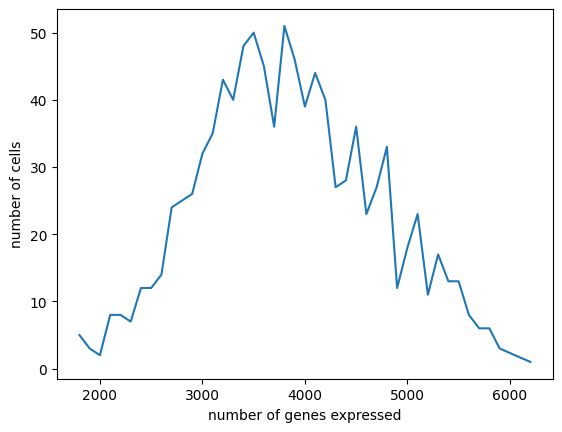

In [12]:
s = df_multi_train_y.gt(0).sum(axis = 1)
counts = s.groupby(lambda x: s[x] // 100).count()
counts.index = counts.index * 100

fig, ax = plt.subplots()
ax.plot(counts.index, counts.values)
ax.set_xlabel('number of genes expressed')
ax.set_ylabel('number of cells')
plt.show()

マルチオームテストで得られた遺伝子発現データの概要を説明した後、citeseqテストで得られたデータと比較してみます。

### 2.2.2 citeseqによる遺伝子発現

In [13]:
df_cite_train_x = pd.read_hdf(FP_CITE_TRAIN_INPUTS,start=START,stop=STOP)
df_cite_train_x.head()

gene_id,ENSG00000121410_A1BG,ENSG00000268895_A1BG-AS1,ENSG00000175899_A2M,ENSG00000245105_A2M-AS1,ENSG00000166535_A2ML1,ENSG00000128274_A4GALT,ENSG00000094914_AAAS,ENSG00000081760_AACS,ENSG00000109576_AADAT,ENSG00000103591_AAGAB,...,ENSG00000153975_ZUP1,ENSG00000086827_ZW10,ENSG00000174442_ZWILCH,ENSG00000122952_ZWINT,ENSG00000198205_ZXDA,ENSG00000198455_ZXDB,ENSG00000070476_ZXDC,ENSG00000162378_ZYG11B,ENSG00000159840_ZYX,ENSG00000074755_ZZEF1
cell_id,,,,,,,,,,,,,,,,,,,,,
232a79b634ed,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.000000,3.925279,0.000000,0.0,0.0,0.0,3.925279,0.000000,0.000000,0.000000
c523fbe6d911,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.444875,0.000000,5.535631,0.000000
dd6dc8335202,0.0,0.0,0.0,4.154367,0.0,0.00000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,4.154367,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
54f4a4831971,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,3.569181,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,3.569181,4.248138,0.000000
64d88ab761a1,0.0,0.0,0.0,0.000000,0.0,4.49919,0.0,3.817099,0.0,0.0,...,4.900942,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,3.817099


まず最初に気づくのは、gene_idの始まりは、今までマルチオームデータで見てきたものとほぼ同じですが、新しいsuffixがあることです。では、このsuffixは何なのでしょうか？

gene_idのEnsembl IDを [ensembl.org](https://www.ensembl.org/Homo_sapiens/Gene/Summary?db=core;g=ENSG00000121410;r=19:58345178-58353492)で確認。 (この場合ENSG00000121410)このsuffixは実際には遺伝子名であることがわかる。次のコードセルで見るように、このsuffixがなくてもgene_idはユニークなので、今のところredundantな情報に見えます。

In [14]:
gene_ids_multiome = set(df_multi_train_y.columns)
print(f"Different Gene IDs in multiome: {len(gene_ids_multiome)}")
#for now we just keep the stem of the gene_id
gene_ids_citeseq = set([i[:i.find("_")] for i in df_cite_train_x.columns])
print(f"Different Gene IDs in citeseq: {len(gene_ids_citeseq)}")

Different Gene IDs in multiome: 23418
Different Gene IDs in citeseq: 22050


前述したように、サフィックスを除去してもユニークな名前が得られる。

遺伝子発現について、両方のデータセットに重複がないか調べてみよう。

In [16]:
print(f"Elements in Set Union: {len(gene_ids_citeseq | gene_ids_multiome)}")
print(f"Elements in Set Intersection: {len(gene_ids_citeseq & gene_ids_multiome)}")
print(f"multiome has {len(gene_ids_multiome - gene_ids_citeseq)} unique gene ids.")
print(f"Citeseq has {len(gene_ids_citeseq - gene_ids_multiome)} unique gene ids.")

Elements in Set Union: 27082
Elements in Set Intersection: 18386
multiome has 5032 unique gene ids.
Citeseq has 3664 unique gene ids.


巨大な交差点があっても、各検査に固有の遺伝子はかなりあります。

これからもう一度、値の分布についての情報を得ます。

In [17]:
print(f"Values for gene expression range from {df_cite_train_x.min().min():.2f} to {df_cite_train_x.max().max():.2f}")

# get data about non-zero values
min_cells_non_zero_y = df_cite_train_x.gt(0).sum(axis=1).min()
max_cells_non_zero_y = df_cite_train_x.gt(0).sum(axis=1).max()
sum_non_zero_values_y = df_cite_train_x.sum().sum()
count_non_zero_values_y = df_cite_train_x.gt(0).sum().sum()
average_non_zero_per_gene_y = df_cite_train_x[df_cite_train_x.gt(0)].count(axis = 1).mean()

print(f"Each cell has at least {min_cells_non_zero_y} genes with non-zero gene expression values and a maximum of {max_cells_non_zero_y}.")
print(f"On average there are {round(average_non_zero_per_gene_y)} genes with non-zero gene expression values in each cell.")
print(f"The average non-zero value for gene expression is about {sum_non_zero_values_y / count_non_zero_values_y:.2f}.")

# investigate standard deviation of features
std_dev_of_genes_y = df_cite_train_x.std()

# ignore genes that are only accessible in a single cell
std_dev_of_genes_without_singles_y = std_dev_of_genes_y[df_cite_train_x.gt(0).sum().gt(1)]
print(f"The standard deviation of gene expression values is between {std_dev_of_genes_without_singles_y.min():.2f} and {std_dev_of_genes_without_singles_y.max():.2f}.\nThe average standard deviation is {std_dev_of_genes_without_singles_y.mean():.2f}")

Values for gene expression range from 0.00 to 11.29
Each cell has at least 2234 genes with non-zero gene expression values and a maximum of 7319.
On average there are 5003 genes with non-zero gene expression values in each cell.
The average non-zero value for gene expression is about 4.39.
The standard deviation of gene expression values is between 0.14 and 2.88.
The average standard deviation is 1.12


シテスクとマルチオームテストで得られた遺伝子発現の特徴は非常によく似ていることがわかる。値は同じ範囲にあり、また標準偏差と非ゼロ値の平均も同程度の大きさです。今のところ、データの一部しか見ていませんので、これが全データに当てはまるかどうかは興味深いところです。それは後ほど。

とりあえず、個々の細胞でどれくらいの遺伝子が発現しているのかを見てみよう。

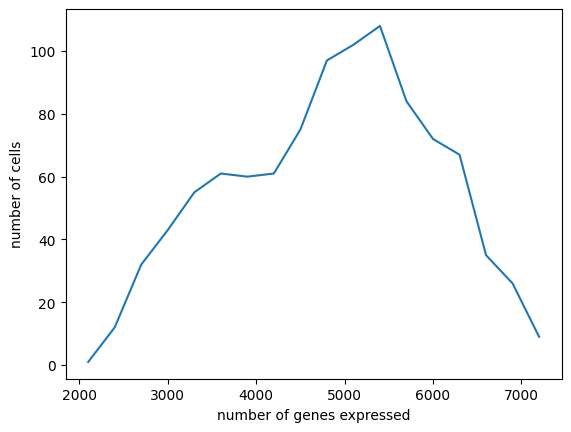

In [18]:
s = df_cite_train_x.gt(0).sum(axis = 1)
counts = s.groupby(lambda x: s[x] // 300).count()
counts.index = counts.index * 300

fig, ax = plt.subplots()
ax.plot(counts.index, counts.values)
ax.set_xlabel('number of genes expressed')
ax.set_ylabel('number of cells')
plt.show()

以上、citeseqテストによって得られた遺伝子発現データについての考察をまとめました。multiomeで得られたデータと同等であることがわかりました。大きな違いは、どちらも1つの検査でしか測定されないユニークな遺伝子があることです。この後、このデータの比較可能性が、試験で得られた生データの先行正規化によるものかどうか、また、例えば2.4という発現値が実際に何を意味するのか、という問題にも取り組みます。

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>2.3 表面タンパク質レベルのデータ</b></p>
</div>

最後に、citeseqで集めた表面タンパク質のレベルデータを見ていただきます。

In [19]:
df_cite_train_y = pd.read_hdf(FP_CITE_TRAIN_TARGETS)
df_cite_train_y.head()

gene_id,CD86,CD274,CD270,CD155,CD112,CD47,CD48,CD40,CD154,CD52,...,CD94,CD162,CD85j,CD23,CD328,HLA-E,CD82,CD101,CD88,CD224
cell_id,,,,,,,,,,,,,,,,,,,,,
45006fe3e4c8,1.167804,0.622530,0.106959,0.324989,3.331674,6.426002,1.480766,-0.728392,-0.468851,-0.073285,...,-0.448390,3.220174,-0.533004,0.674956,-0.006187,0.682148,1.398105,0.414292,1.780314,0.548070
d02759a80ba2,0.818970,0.506009,1.078682,6.848758,3.524885,5.279456,4.930438,2.069372,0.333652,-0.468088,...,0.323613,8.407108,0.131301,0.047607,-0.243628,0.547864,1.832587,0.982308,2.736507,2.184063
c016c6b0efa5,-0.356703,-0.422261,-0.824493,1.137495,0.518924,7.221962,-0.375034,1.738071,0.142919,-0.971460,...,1.348692,4.888579,-0.279483,-0.131097,-0.177604,-0.689188,9.013709,-1.182975,3.958148,2.868600
ba7f733a4f75,-1.201507,0.149115,2.022468,6.021595,7.258670,2.792436,21.708519,-0.137913,1.649969,-0.754680,...,1.504426,12.391979,0.511394,0.587863,-0.752638,1.714851,3.893782,1.799661,1.537249,4.407671
fbcf2443ffb2,-0.100404,0.697461,0.625836,-0.298404,1.369898,3.254521,-1.659380,0.643531,0.902710,1.291877,...,0.777023,6.496499,0.279898,-0.841950,-0.869419,0.675092,5.259685,-0.835379,9.631781,1.765445


これまで見てきたものと比べると、このデータセットのカラム数は非常に少ない。細胞あたり140個の特徴量を計測しています。ほとんどの名前はCDで始まっており、これは "Cluster of differentiation "の略である。CDは、細胞が発現している表面分子を分類するために使われます。この情報をもとに、どのような細胞が存在するのか、あるいはこの細胞が体内でどのような機能を果たすことになっているのかを知ることができるのです（この理解が少しでも正しいかどうか、私には自信がありません）。

生物学的な見方は一旦忘れて、データサイエンス中心の見方に注目しましょう。次のセルで見るように、このデータセットにはゼロ値がないので、以前行った計算（例えばゼロでない値のカウント）の多くは無意味である。他の機能にも目を向けてみよう。

In [20]:
print(f"Measurements of surface protein levels range from {df_cite_train_y.min().min():.2f} to {df_cite_train_y.max().max():.2f}.")
print(f"The average value is {df_cite_train_y.mean().mean():.2f}.")
print(f"The standard deviation of surface protein levels is between {df_cite_train_y.std().min():.2f} and {df_cite_train_y.std().max():.2f}.")
print(f"The average standard deviation is {df_cite_train_y.std().mean():.2f}.")

Measurements of surface protein levels range from -52.48 to 120.46.
The average value is 1.89.
The standard deviation of surface protein levels is between 0.73 and 7.87.
The average standard deviation is 1.76.


また、ゼロ値がないのは、計測の精度が悪いからではないか、ということも知りたい。次のコードはそれをチェックするものです。ATTENTION: 今現在、閾値は完全に任意であり、このテストがどの程度正確かわかったら修正する予定です

In [21]:
threshold = 0.1
df_cite_train_y.applymap(lambda x: abs(x)).gt(threshold).sum(axis = 1)
print(f"Each cell has between {df_cite_train_y.applymap(lambda x: abs(x)).gt(threshold).sum(axis = 1).min()} and {df_cite_train_y.applymap(lambda x: abs(x)).gt(threshold).sum(axis = 1).max()} measurements with absolute values over {threshold}.")

Each cell has between 103 and 140 measurements with absolute values over 0.1.


0の値がないのは、測定の不正確さが原因ではなさそうですが、さすがにこれは確認する必要がありますね

# 3 Other Data
ｖ

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>3.1 metadata.csvの検証</b></p>
</div>

メタデータは metadata.csv ファイルに格納される。このファイルには、データセットの各セルについて1行が含まれ、そのセルに関するいくつかの追加情報が提供される。

In [22]:
df_meta = pd.read_csv(FP_CELL_METADATA).set_index("cell_id")
df_meta

,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...
96a60b026659,10,31800,hidden,multiome
d493e546991e,10,31800,hidden,multiome
05666c99aa48,10,31800,hidden,multiome


各セルについて、**day**の列は、そのテストが行われた日を示していることがわかります。実際に行われたテストは、**technology**の欄に記載されています。実験は1日目に開始されたので、最初のテストは細胞に初めてNeupogenが注入された1日後に行われたことに注意してください。 ([compare here](https://allcells.com/research-grade-tissue-products/mobilized-leukopak/)). 4人のドナーそれぞれに、細胞の起源に関する情報を示す **donor** IDがある。最後に、**cell_type** というカラムがある。細胞の種類は人間が付けたラベルである。この情報は不正確である可能性があり、例えば表面タンパク質のレベルについて結論を出すことが可能であるため、テストデータでは利用できない。後でそれを利用できるかどうかは不明である（バランスド・スプリットの作成に利用できるかもしれないが、それはまたの機会に）。

[jirkaborovec](https://www.kaggle.com/jirkaborovec) このメタデータについては、すでに素晴らしい分析がなされています。 [notebook](https://www.kaggle.com/code/jirkaborovec/mmscel-inst-eda-stat-predictions).v

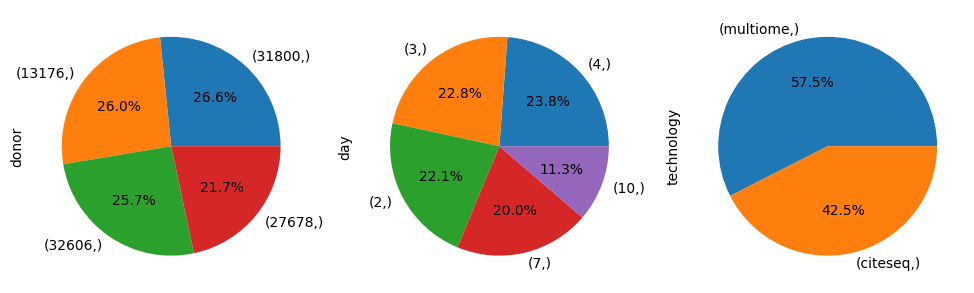

In [23]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))
for i, col in enumerate(["donor", "day", "technology"]):
    _= df_meta[[col]].value_counts().plot.pie(ax=axarr[i], autopct='%1.1f%%', ylabel=col)

見てわかるように、細胞データはかなりバランスが取れています。各ドナーからの細胞はほぼ同数です（最初の写真の大きな数字がドナーのIDです）。また、実験の日数もかなりバランスが取れています。最終日の10日目には、11％の細胞しか入っていません。10日目は、列車データには全く存在しない唯一の日でもあります また、トレインセットにはドナー27678のデータは含まれていない!

マルチノームテストでは、若干多くのデータが利用可能です。マルチノームテストでは、より多くの特徴を予測する必要があるため、最悪ではありません。

一般的にデータの分布はかなりバランスが取れています（例：受験回数／テスト／日数がうまく分布しているなど）。メタデータのより詳細な分析については、すでに紹介した [notebook](https://www.kaggle.com/code/jirkaborovec/mmscel-inst-eda-stat-predictions).

<div style="color:white;display:fill;
            background-color:#3bb2d6;font-size:200%;">
    <p style="padding: 4px;color:white;"><b>3.2 提出ヘルパーの検査</b></p>
</div>

結果提出に関するファイルは2つあり、evaluation_ids.csvはコンペに提出するデータを指定し、sample_submission.csvは提出データのフォーマットに関するガイドとなるものである。

# X メモ

本文中には、まだ解決すべき未解決の問題がある。また、最終的なデータフォーマットでは、値の精度、つまりデータの格納に何ビット取るかについて理解を深めたいと思います。